# Import tyre file

In [1]:
import numpy as np
from src.utils.initialize_tyre import Tyre
import matplotlib.pyplot as plt

current_tyre = Tyre(
    'car205_60R19.tir',
    validate=True,
    use_alpha_star=False,
    check_format=False)

TIR file 'car205_60R19.tir' successfully loaded.
Validation of TIR file successful. All parameters found for version MF6.2
Tyre instance of type <class 'src.models.magic_formula_61.MF61'> successfully created.


# Pure slip longitudinal force test

In [2]:
# longitudinal test
n = 5
SR = np.linspace(-1.0, 1.0, 100)
FZ = np.linspace(100, 2000, n)
longitudinal_result = n * [None]
FX   = n * [None]
mu_x = n * [None]
Cx   = n * [None]
for i, load in enumerate(FZ):
    FX[i]   = current_tyre.find_fx_pure(SR.tolist(), load)
    mu_x[i] = current_tyre.find_mu_x(load)
    Cx[i]   = current_tyre.find_slip_stiffness(load)

# plot FX over SL for various loads
fig, ax = plt.subplots()
for i, force in enumerate(FX):
    ax.plot(SR, force)
ax.set(xlabel='slip ratio', ylabel='FX (N)')
ax.legend(FZ)
ax.grid()

# plot mu curve and mu output
fig2, ax2 = plt.subplots()
ax2.plot(SR, FX[3] / FZ[3], color='red')
ax2.plot(SR, mu_x[3] * np.ones_like(FX[3]), color='red', linestyle='--')
ax2.plot(SR, -mu_x[3] * np.ones_like(FX[3]), color='red', linestyle='--')
ax2.set(xlabel='slip ratio', ylabel='mu_x')
ax2.grid()

# plot CX over SL for various loads
fig3, ax3 = plt.subplots()
for i, stiffness in enumerate(Cx):
    ax3.plot(SR, stiffness * np.ones_like(SR))
ax3.set(xlabel='slip ratio', ylabel='Cx (N/slip)')
ax3.grid()
plt.show()

TypeError: 'bool' object is not iterable

# Combined slip longitudinal force test

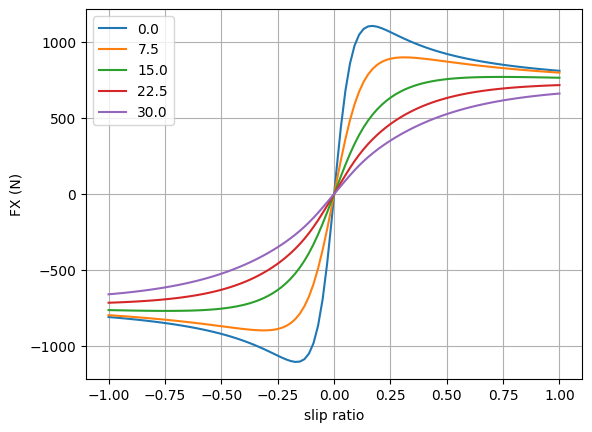

In [12]:
# longitudinal force for combined slip
n = 5
SR = np.linspace(-1.0, 1.0, 100)
SA = np.deg2rad(np.linspace(0, 30, n))
FZ = 1000
longitudinal_result = n * [None]
FX   = n * [None]
for i, angle in enumerate(SA):
    FX[i]   = current_tyre.find_fx(angle, SR, FZ)

# plot
fig, ax = plt.subplots()
for i, force in enumerate(FX):
    ax.plot(SR, force)
ax.set(xlabel='slip ratio', ylabel='FX (N)')
ax.grid()
ax.legend(np.rad2deg(SA).round(1))
plt.show()

# Pure slip lateral force test

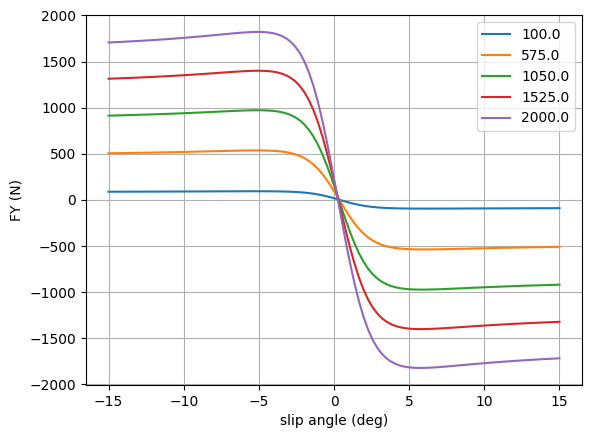

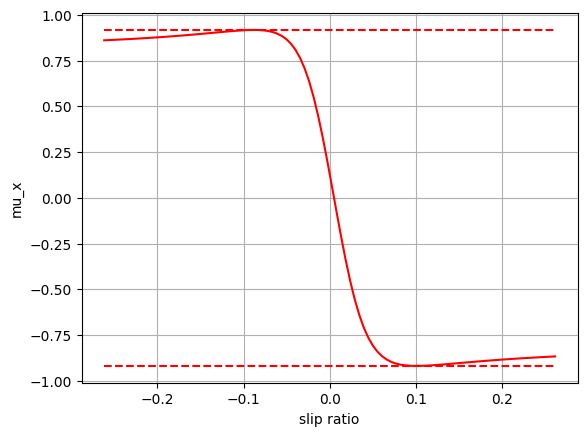

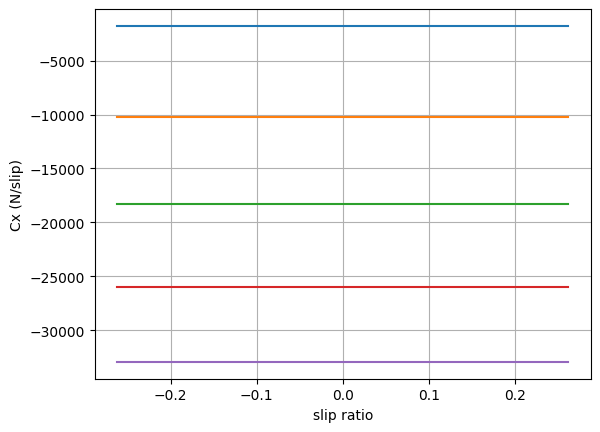

In [13]:
# lateral test
n = 5
SA = np.deg2rad(np.linspace(-15, 15, 100))
FZ = np.linspace(100, 2000, n)
lateral_result = n * [None]
FY = n * [None]
mu_y = n * [None]
Cy = n * [None]
for i, load in enumerate(FZ):
    FY[i]   = current_tyre.find_fy_pure(SA, load)
    mu_y[i] = current_tyre.find_mu_y(load)
    Cy[i]   = current_tyre.find_cornering_stiffness(load)

# plot
fig, ax = plt.subplots()
for i, force in enumerate(FY):
    ax.plot(np.rad2deg(SA), force)
ax.set(xlabel='slip angle (deg)', ylabel='FY (N)')
ax.grid()
ax.legend(FZ)

# plot mu curve and mu output
fig2, ax2 = plt.subplots()
ax2.plot(SA, FY[3] / FZ[3], color='red')
ax2.plot(SA, mu_y[3] * np.ones_like(FY[3]), color='red', linestyle='--')
ax2.plot(SA, -mu_y[3] * np.ones_like(FY[3]), color='red', linestyle='--')
ax2.set(xlabel='slip ratio', ylabel='mu_x')
ax2.grid()

# plot CX over SL for various loads
fig3, ax3 = plt.subplots()
for i, stiffness in enumerate(Cy):
    ax3.plot(SA, stiffness * np.ones_like(SA))
ax3.set(xlabel='slip ratio', ylabel='Cx (N/slip)')
ax3.grid()

plt.show()

# Combined slip lateral force test

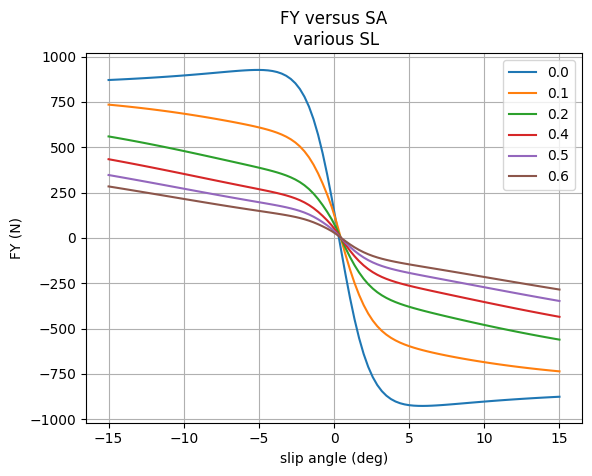

In [14]:
# lateral test
n = 6
SA = np.deg2rad(np.linspace(-15, 15, 100))
FZ = 1000
SR = np.linspace(0, 0.6, n)
lateral_result = n * [None]
FY = n * [None]
mu_y = n * [None]
KYA = n * [None]
for i, slip in enumerate(SR):
    FY[i] = current_tyre.find_fy(SA, slip, FZ)

# plot
fig, ax = plt.subplots()
for i, slip in enumerate(SR):
    ax.plot(np.rad2deg(SA), FY[i])
ax.set(xlabel='slip angle (deg)', ylabel='FY (N)', title='FY versus SA\n various SL')
ax.grid()
ax.legend(SR.round(1))
plt.show()

# Combined forces test

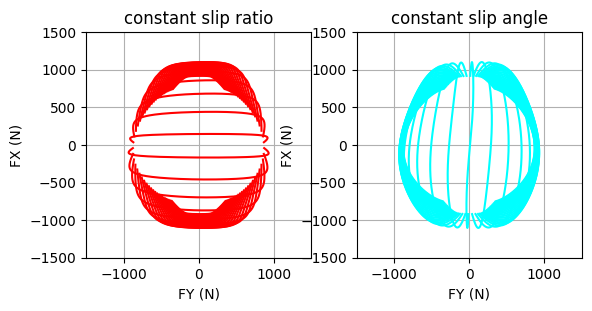

In [6]:
# combined forces test
n = 50
FZ = 1000
sa_lim = 15
sr_lim = 0.5

fig, (ax1, ax2) = plt.subplots(1,2)

# constant slip ratio lines
SR = np.linspace(-sr_lim, sr_lim, n)
SA = np.linspace(-sa_lim, sa_lim, 500)
FX, FY = n * [None], n * [None]
F = n * [None, None, None]
for i, slip_ratio in enumerate(SR):
    F[i] = current_tyre.find_forces(np.deg2rad(SA), slip_ratio, FZ)

    ax1.plot(F[i][1], F[i][0], color='red')

# constant slip angle lines
SR = np.linspace(-sr_lim, sr_lim, 500)
SA = np.linspace(-sa_lim, sa_lim, n)
F = n * [None, None, None]
for i, slip_angle in enumerate(SA):
    F[i] = current_tyre.find_forces(np.deg2rad(slip_angle), SR, FZ)

    ax2.plot(F[i][1], F[i][0], color='cyan')

ax1.set(xlabel='FY (N)', ylabel='FX (N)', xlim=(-1500, 1500), ylim=(-1500, 1500), title='constant slip ratio')
ax2.set(xlabel='FY (N)', ylabel='FX (N)', xlim=(-1500, 1500), ylim=(-1500, 1500), title='constant slip angle')
ax1.set_aspect('equal'), ax2.set_aspect('equal')
ax1.grid(), ax2.grid()
plt.show()

# Pure slip self overturning moment test

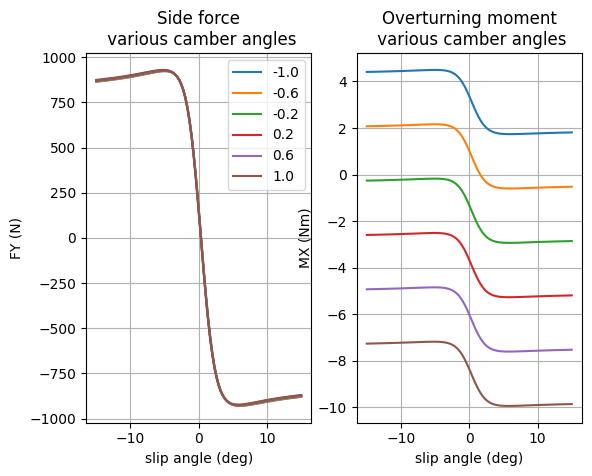

In [7]:
# lateral test
n = 6
SA = np.deg2rad(np.linspace(-15, 15, 100))
FZ = 1000
IA = np.deg2rad(np.linspace(-1, 1, n))
FY = n * [None]
MX = n * [None]
for i, camber in enumerate(IA):
    FY[i] = current_tyre.find_fy_pure(SA, FZ, IA=camber)
    MX[i] = current_tyre.find_mx_pure(SA, FZ, IA=camber)

# plot
fig, (ax1, ax2) = plt.subplots(1,2)
for i, camber in enumerate(IA):
    ax1.plot(np.rad2deg(SA), FY[i])
    ax2.plot(np.rad2deg(SA), MX[i])
ax1.set(xlabel='slip angle (deg)', ylabel='FY (N)', title='Side force\n various camber angles')
ax2.set(xlabel='slip angle (deg)', ylabel='MX (Nm)', title='Overturning moment\n various camber angles')
ax1.legend(np.rad2deg(IA).round(1))
ax1.grid(), ax2.grid()
plt.show()

# Combined slip overturning moment test

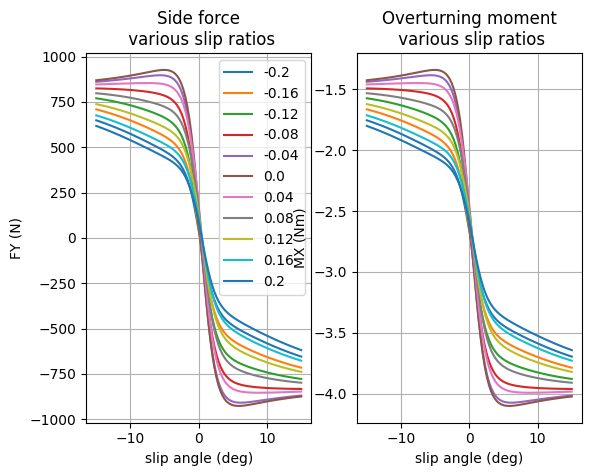

In [8]:
# lateral test
n = 11
SA = np.deg2rad(np.linspace(-15, 15, 100))
FZ = 1000
SL = np.linspace(-0.2, 0.2, n)
FY = n * [None]
MX = n * [None]
for i, slip in enumerate(SL):
    FY[i] = current_tyre.find_fy(SA, slip, FZ)
    MX[i] = current_tyre.find_mx(SA, slip, FZ)

# plot
fig, (ax1, ax2) = plt.subplots(1,2)
for i, slip in enumerate(SL):
    ax1.plot(np.rad2deg(SA), FY[i])
    ax2.plot(np.rad2deg(SA), MX[i])
ax1.set(xlabel='slip angle (deg)', ylabel='FY (N)', title='Side force\n various slip ratios')
ax2.set(xlabel='slip angle (deg)', ylabel='MX (Nm)', title='Overturning moment\n various slip ratios')
ax1.legend(SL.round(2))
ax1.grid(), ax2.grid()
plt.show()

# Pure slip self-aligning moment test

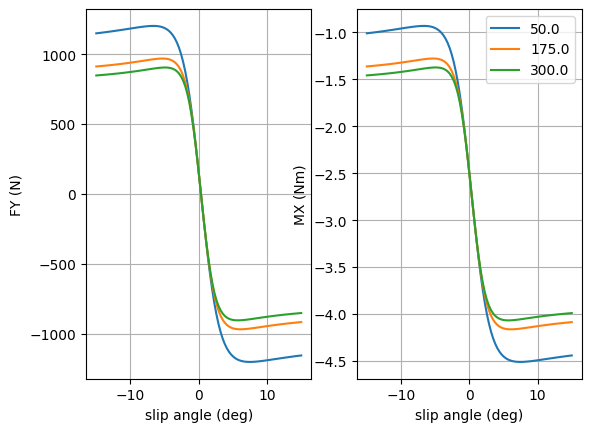

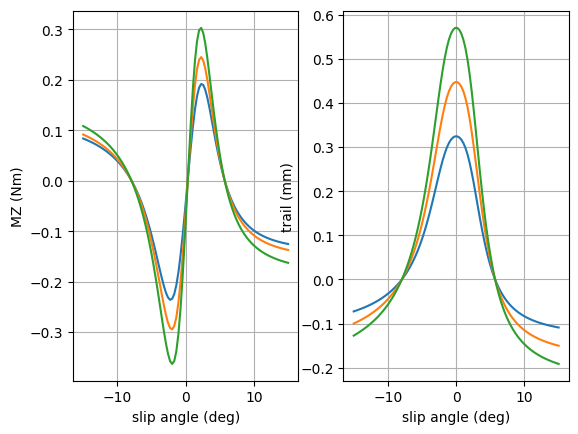

In [9]:
# lateral test
n = 3
SA = np.deg2rad(np.linspace(-15, 15, 100))
FZ = 1000
P  = 1e3 * np.linspace(50, 300, n)
FY = n * [None]
MX = n * [None]
MZ = n * [None]
T0 = n * [None]
for i, press in enumerate(P):
    FY[i] = current_tyre.find_fy_pure(SA, FZ, P=press)
    MX[i] = current_tyre.find_mx_pure(SA, FZ, P=press)
    MZ[i] = current_tyre.find_mz_pure(SA, FZ, P=press)
    T0[i] = current_tyre.find_trail_pure(SA, FZ, P=press) * 1e3

# plot
fig1, (ax1, ax2) = plt.subplots(1,2)
fig2, (ax3, ax4) = plt.subplots(1,2)

for i, press in enumerate(P):
    ax1.plot(np.rad2deg(SA), FY[i])
    ax2.plot(np.rad2deg(SA), MX[i])
    ax3.plot(np.rad2deg(SA), MZ[i])
    ax4.plot(np.rad2deg(SA), T0[i])

ax1.set(xlabel='slip angle (deg)', ylabel='FY (N)')
ax2.set(xlabel='slip angle (deg)', ylabel='MX (Nm)')
ax3.set(xlabel='slip angle (deg)', ylabel='MZ (Nm)')
ax4.set(xlabel='slip angle (deg)', ylabel='trail (mm)')
ax1.grid(), ax2.grid(), ax3.grid(), ax4.grid()
ax2.legend(P/1e3)
plt.show()